In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from bidict import bidict

In [2]:
ENCODER = bidict({
    'A': 1,'I': 2,'U': 3,'E': 4,'O': 5,
    'KA': 6,'KI': 7,'KU': 8,'KE': 9,'KO': 10,
    'SA': 11,'SHI': 12,'SU': 13,'SE': 14,'SO': 15,
    'TA': 16,'CHI': 17,'TSU': 18,'TE': 19,'TO': 20,
    'NA': 21,'NI': 22,'NU': 23,'NE': 24,'NO': 25,
    'HA': 26,'HI': 27,'FU': 28,'HE': 29,'HO': 30,
    'MA': 31,'MI': 32,'MU': 33,'ME': 34,'MO': 35,
    'YA': 36,'YU': 37,'YO': 38,
    'RA': 39,'RI': 40,'RU': 41,'RE': 42,'RO': 43,
    'WA': 44,'WO': 45,'N': 46
})

In [3]:
labels = np.load("../data/labels.npy")

In [4]:
labels = np.array([ENCODER[x] for x in labels])

In [5]:
imgs = np.load("../data/imgs.npy")

In [6]:
imgs = imgs.astype("float32") / 255

In [7]:
imgs = np.expand_dims(imgs, -1)

In [8]:
batch_size = 32
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(100, 100, 1)),
    layers.Conv2D(128, kernel_size=(4, 4), activation="relu"),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.2),
    layers.Conv2D(256, kernel_size=(4, 4), activation="relu"),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Flatten(),
    layers.Dropout(0.2),
#     layers.Dense(64, activation="relu"),
    layers.Dense(len(ENCODER)+1, activation="softmax"),
])

In [9]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [10]:
model.fit(imgs,
          labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.30,
          callbacks=[early_stopping])

Epoch 1/20
28/28 [==============================] - 48s 2s/step - loss: 3.8512 - accuracy: 0.0317 - val_loss: 3.4865 - val_accuracy: 0.1003
Epoch 2/20
28/28 [==============================] - 45s 2s/step - loss: 2.2194 - accuracy: 0.4281 - val_loss: 1.0996 - val_accuracy: 0.6702
Epoch 3/20
28/28 [==============================] - 46s 2s/step - loss: 0.5957 - accuracy: 0.8256 - val_loss: 0.6682 - val_accuracy: 0.8100
Epoch 4/20
28/28 [==============================] - 46s 2s/step - loss: 0.3097 - accuracy: 0.9026 - val_loss: 0.4548 - val_accuracy: 0.8786
Epoch 5/20
28/28 [==============================] - 44s 2s/step - loss: 0.1835 - accuracy: 0.9456 - val_loss: 0.4716 - val_accuracy: 0.8654
Epoch 6/20
28/28 [==============================] - 46s 2s/step - loss: 0.1268 - accuracy: 0.9592 - val_loss: 0.4528 - val_accuracy: 0.8734
Epoch 7/20
28/28 [==============================] - 44s 2s/step - loss: 0.0741 - accuracy: 0.9796 - val_loss: 0.3431 - val_accuracy: 0.9103
Epoch 8/20
28/28 [==

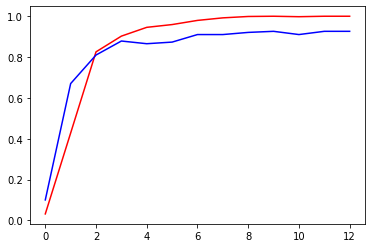

In [11]:
plt.plot(model.history.history['accuracy'], color="red")
plt.plot(model.history.history['val_accuracy'], color="blue")
plt.show()

In [21]:
i = imgs[:10]

In [22]:
np.argmax(model.predict(i), axis=-1)

array([42,  3, 46, 29, 41,  9, 29, 30, 22, 36])

In [24]:
labels[:10]

array([42,  3, 46, 29, 41,  9, 29, 30, 22, 36])

In [12]:
model.save("../kana.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../kana.model/assets
